In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

theme_colors = ['#E9EAEC', '#FAD02C', '#90ADC6', '#333652']

font = 'Courier New'

In [ ]:
x=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df=x
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
#Cleaning

In [ ]:
print(f'{df.shape[0]} rows')
print(f'{df.shape[1]} columns')


5110 rows
12 columns


In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


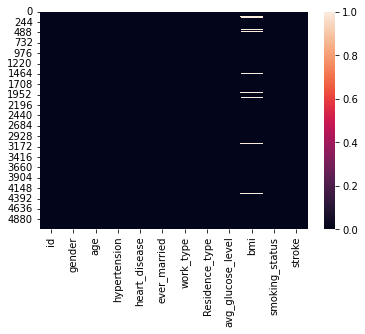

In [ ]:
x=sns.heatmap(df.isnull())
x


In [ ]:
percentage= df.isnull().sum()*100/len(df)
percentage

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
df=df.dropna(axis=0)

In [ ]:
percentage= df.isnull().sum()*100/len(df)
percentage

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
df=df.drop('id',axis=1)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df = df[df['gender'] != 'Other']
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908,4908.000000,4908.000000,4908.000000,4908,4908,4908,4908.000000,4908.00000,4908,4908.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2810,2490,NaN,NaN,1852,NaN
mean,NaN,42.868810,0.091891,0.049511,NaN,NaN,NaN,105.297402,28.89456,NaN,0.042584
std,NaN,22.556128,0.288901,0.216954,NaN,NaN,NaN,44.425550,7.85432,NaN,0.201937
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.30000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.067500,23.50000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.10000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.495000,33.10000,NaN,0.000000


In [ ]:
#Analysis

In [ ]:
df = df.drop(df.index[df['smoking_status'] =='Unknown'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
gender_count = df.groupby(['gender']).size().reset_index().rename(columns={0: 'count'})
hypertension_count = df.groupby(['hypertension']).size().reset_index().rename(columns={0: 'count'})
heart_disease_count = df.groupby(['heart_disease']).size().reset_index().rename(columns={0: 'count'})
ever_married_count = df.groupby(['ever_married']).size().reset_index().rename(columns={0: 'count'})
work_type_count = df.groupby(['work_type']).size().reset_index().rename(columns={0: 'count'})
residence_type_count = df.groupby(['Residence_type']).size().reset_index().rename(columns={0: 'count'})
smoking_status_count = df.groupby(['smoking_status']).size().reset_index().rename(columns={0: 'count'})
stroke_count = df.groupby(['stroke']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=4, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])

## Gender Donut Chart
fig.add_trace(
    go.Pie(
        labels=gender_count['gender'],
        values=gender_count['count'],
        hole=.6,
        title='Gender',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## hypertension Donut Chart
fig.add_trace(
    go.Pie(
        labels=hypertension_count['hypertension'],
        values=hypertension_count['count'],
        hole=.6,
        title='Hypertension',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## heart_disease Donut Chart
fig.add_trace(
    go.Pie(
        labels=heart_disease_count['heart_disease'],
        values=heart_disease_count['count'],
        hole=.6,
        title='Heart Disease',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## ever_married Donut Chart
fig.add_trace(
    go.Pie(
        labels=ever_married_count['ever_married'],
        values=ever_married_count['count'],
        hole=.6,
        title='Ever Married',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## work_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=work_type_count['work_type'],
        values=work_type_count['count'],
        hole=.6,
        title='Work Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## residence_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=residence_type_count['Residence_type'],
        values=residence_type_count['count'],
        hole=.6,
        title='Residence Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

## smoking_status Donut Chart
fig.add_trace(
    go.Pie(
        labels=smoking_status_count['smoking_status'],
        values=smoking_status_count['count'],
        hole=.6,
        title='Smoking Status',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=1
    )

## stroke Donut Chart
fig.add_trace(
    go.Pie(
        labels=stroke_count['stroke'],
        values=stroke_count['count'],
        hole=.6,
        title='Stroke',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
#         colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1200, 
                  width=1000,
                  template='plotly_dark',
                  title_x=0.5
                  )
a=fig.show()
a

In [ ]:
fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))
fig.add_trace(go.Histogram(x=df['age'],name='age'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['avg_glucose_level'],name='avg_glucose_level'),row=2,col=1)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

In [ ]:
stroke_df = df[df['stroke'] == 1]
no_stroke_df = df[df['stroke'] == 0]

fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))

fig.add_trace(go.Box(y=stroke_df['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_df['age'], name='no_stroke'),row=1,col=1)

fig.add_trace(go.Box(y=stroke_df['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=no_stroke_df['avg_glucose_level'],name='no_stroke'),row=2,col=1)


fig.update_layout(height=800, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

In [ ]:
color_palette = ['#FFFCFE', '#B6E2D3', '#D8F9B1']

corr = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale=color_palette,
                                 text = corr.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )

fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='plotly_dark'
                  )

fig.show()

In [ ]:
## Grouping Datasets
gender_stroke_df = df.groupby(['gender', 'stroke']).size().reset_index().rename(columns={0: 'count'})

hypertension_stroke_df = df.groupby(['hypertension', 'stroke']).size().reset_index().rename(columns={0: 'count'})

married_stroke_df = df.groupby(['ever_married', 'stroke']).size().reset_index().rename(columns={0: 'count'})

work_type_stroke_df = df.groupby(['work_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

residence_stroke_df = df.groupby(['Residence_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

smoking_stroke_df = df.groupby(['smoking_status', 'stroke']).size().reset_index().rename(columns={0: 'count'})


## Creating Sunburst Figures
sb1 = px.sunburst(gender_stroke_df, values='count', path=['gender', 'stroke'])
sb2 = px.sunburst(hypertension_stroke_df, values='count', path=['hypertension', 'stroke'])

sb3 = px.sunburst(married_stroke_df, values='count', path=['ever_married', 'stroke'])
sb4 = px.sunburst(work_type_stroke_df, values='count', path=['work_type', 'stroke'])

sb5 = px.sunburst(residence_stroke_df, values='count', path=['Residence_type', 'stroke'])
sb6 = px.sunburst(smoking_stroke_df, values='count', path=['smoking_status', 'stroke'])



## Subplots
fig = make_subplots(rows=3, cols=2, specs=[
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}]
], subplot_titles=("Gender and Stroke", "Hypertension and Stroke",
                   "Married and Stroke", "Work Type and Stroke",
                   "Residence and Stroke","smoke and stroke"))

## Plotting Figures
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)
fig.add_trace(sb5.data[0], row=3, col=1)
fig.add_trace(sb6.data[0], row=3, col=2)
fig.update_traces(textinfo="label+percent parent")

# Update title and height
fig.update_layout(title_text="Stroke Sunbursts", title_x=0.5, height=1300, template='plotly_dark', showlegend=False,
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

In [ ]:
fig=make_subplots(rows=1,cols=1,subplot_titles='<i>Age')
fig.add_trace(go.Histogram(x=df['bmi'],name='BMI'),row=1,col=1)
fig.update_layout(height=800, width=1000, title_text='<b>BMI Histogram Plots', font_size=20, showlegend=False)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

In [ ]:
#'                                                 OBSERVATIONS
'''Gender and Stroke :
      Males: Out of 39% male 6% had a stroke.
      Females: out of 61% female 5% had a stroke.
Hypertension and Stroke:
      Hypertension: out of 12% people 13% had a stroke.
      No Hypertension: 4% out of 88% people had a stroke.
Married and Stroke :
      Married: out of 76% married 7% had a stroke.
      Not Married: out of 24% unmarried 2% had a stroke.
Work Type and Stroke :
      Private: 5% had a stroke out of64%.
      Self Employed: 8% had a stroke out of 15 %.
      Take care of Children: 0% had a stroke out of 2%
      Govt. Job: 5% had a stroke out of 18%
Residence and Stroke :
      Urban: 5% had a stroke out of 51%
      Rural: 5% had a stroke out of 49%
Smoking and Stroke :
      Never Smoked: 5% had a stroke outof 54%.
      Formerly Smoked: 8% had a stroke out of 24%.
      Smokes: 5% had a stroke out of 22%'''

'Gender and Stroke :\n      Males: Out of 39% male 6% had a stroke.\n      Females: out of 61% female 5% had a stroke.\nHypertension and Stroke:\n      Hypertension: out of 12% people 13% had a stroke.\n      No Hypertension: 4% out of 88% people had a stroke.\nMarried and Stroke :\n      Married: out of 76% married 7% had a stroke.\n      Not Married: out of 24% unmarried 2% had a stroke.\nWork Type and Stroke :\n      Private: 5% had a stroke out of64%.\n      Self Employed: 8% had a stroke out of 15 %.\n      Take care of Children: 0% had a stroke out of 2%\n      Govt. Job: 5% had a stroke out of 18%\nResidence and Stroke :\n      Urban: 5% had a stroke.\n      Rural: 5% had a stroke.\nSmoking and Stroke :\n      Never Smoked: 5% had a stroke.\n      Formerly Smoked: 8% had a stroke.\n      Smokes: 5% had a stroke.'

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1


In [ ]:
me= df[df['stroke']==1]
me.count

<bound method DataFrame.count of      gender   age  hypertension  heart_disease  ever_married  work_type  \
0         1  67.0             0              1             1          2   
2         1  80.0             0              1             1          2   
3         0  49.0             0              0             1          2   
4         0  79.0             1              0             1          3   
5         1  81.0             0              0             1          2   
..      ...   ...           ...            ...           ...        ...   
240       1  66.0             0              0             1          2   
241       1  57.0             0              0             1          2   
242       1  68.0             0              0             1          2   
243       0  68.0             1              1             1          2   
246       0  75.0             0              0             1          3   

     Residence_type  avg_glucose_level   bmi  smoking_status  stro

In [ ]:
df.count

<bound method DataFrame.count of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
5          1  81.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5100       1  82.0             1              0             1          3   
5102       0  57.0             0              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking

In [ ]:
df["gender"] = df["gender"].astype('category')
df["gender"] = df["gender"].cat.codes
df["ever_married"] = df["ever_married"].astype('category')
df["ever_married"] = df["ever_married"].cat.codes
df["work_type"] = df["work_type"].astype('category')
df["work_type"] = df["work_type"].cat.codes
df["Residence_type"] = df["Residence_type"].astype('category')
df["Residence_type"] = df["Residence_type"].cat.codes
df["smoking_status"] = df["smoking_status"].astype('category')
df["smoking_status"] = df["smoking_status"].cat.codes
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1


In [ ]:
#FEATURE SELECTION

In [ ]:
x = ['age' , 'gender' , 'bmi' , 'heart_disease' , 'hypertension' , 'avg_glucose_level' , 'smoking_status']

In [ ]:
y = ['stroke']
t_x = df[x]
t_y = df['stroke']
t_x.head()


,age,gender,bmi,heart_disease,hypertension,avg_glucose_level,smoking_status
0,67.0,1,36.6,1,0,228.69,0
2,80.0,1,32.5,1,0,105.92,1
3,49.0,0,34.4,0,0,171.23,2
4,79.0,0,24.0,0,1,174.12,1
5,81.0,1,29.0,0,0,186.21,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [ ]:
p10=[]
p20=[]

In [ ]:

for i in range(1000):
  from sklearn.model_selection import train_test_split
  x_train , x_test , y_train , y_test = train_test_split(t_x,t_y , train_size=0.9)

  ''' print(x_train.shape)
  print(y_train.shape)
  print(x_test.shape)
  print(y_test.shape)'''
  from sklearn.metrics import accuracy_score


  model = Pipeline([
                      ('scalar',MinMaxScaler()),
                      ('RandomForestClassifier', RandomForestClassifier())

  ])

  model.fit(x_train,y_train)
  pred = model.predict(x_test)

  acc = accuracy_score(pred , y_test)
  p10.append(acc)
  p20.append(pred.sum()/343)

In [ ]:
print()

In [ ]:
x_test.shape

(343, 7)

In [ ]:
print(pred)
print(pred.sum())

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
3


In [ ]:
print(f'Average Accuracy Rate from 1000 samples of 343 samples each from a set of 4908 is {sum(p10)/len(p10)}')

Average Accuracy Rate from 1000 samples of 343 samples eachfrom a set of 4908 is 0.9463383656149872


In [ ]:
print(f'Average Probability of Brain Stroke from 1000 samples of 343 samples each from a set of 4908 is {sum(p20)/len(p20)}')

Average Probability of Brain Stroke from 1000 samples of 343 samples each from a set of 4908 is 0.0036659642640648874
